<a href="https://colab.research.google.com/github/sfeldmanMIG25/MANE4962_Classwork/blob/main/Feldman_Stephen_ML_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stephen Feldman RIN: 662047892
Homework 3 2/5/2025


Problem 1:Image segmentation is a process to highlight useful regions in images. Use the
skimage.io module to load the following image. Afterwards, segment the image into
multiple useful regions using the k-means clustering method. The segmented image
should highlight, for example, the dashboard, the driver’s arms, cars ahead etc., by
grouping similar pixels together. You do not need to split the data into train and test set
for this problem

In [ ]:
#Un-used imports due to me using the file.upload() method from a previous class assignment.
from skimage import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files

# Upload the image
uploaded = files.upload()

# Load the image
image = io.imread('seg2.jpg')

Saving seg2.jpg to seg2 (1).jpg


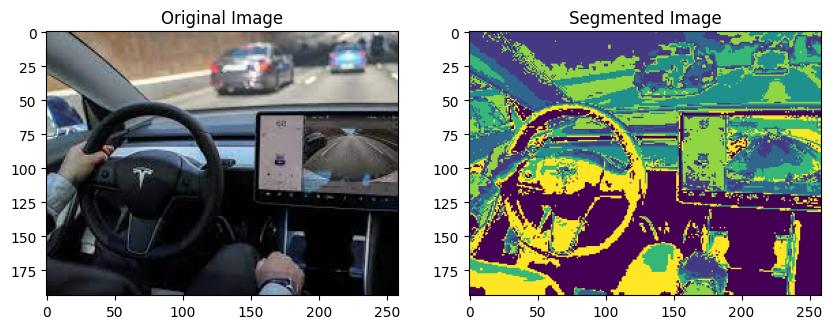

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Reshape the image to a 2D array of pixels
pixels = image.reshape((-1, 3))

# Perform k-means clustering
kmeans = KMeans(n_clusters=7)
kmeans.fit(pixels)
segmented_image = kmeans.labels_.reshape(image.shape[:2])

# Display the original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='viridis')
plt.title('Segmented Image')
plt.show()

Problem 2: Implement your own linear machine learning model optimized with minibatch gradient descent method to predict the price of a house in a city with population
of 160, 000. Train the model to fit the housing prices dataset found on LMS. Vary the
batch size from 1,5,10, and 20. Plot the objective function, J for each batch size. You do not need to split the data into train and test set for this problem. What happens when
you use batch size equal to one?

Saving housing_prices.txt to housing_prices (2).txt


Text(0, 0.5, 'Price in $10,000s')

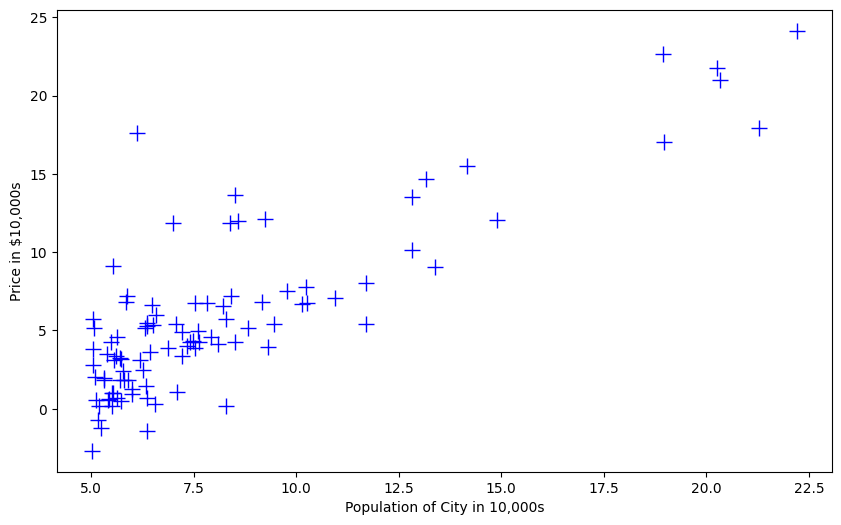

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools
from google.colab import files

datafile = files.upload()
cols = np.loadtxt("housing_prices.txt",delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'b+',markersize=12)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')

<ipython-input-28-168ca645fa52>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float((1. / (2 * len(y))) * np.dot((h(w, X) - y).T, (h(w, X) - y)))


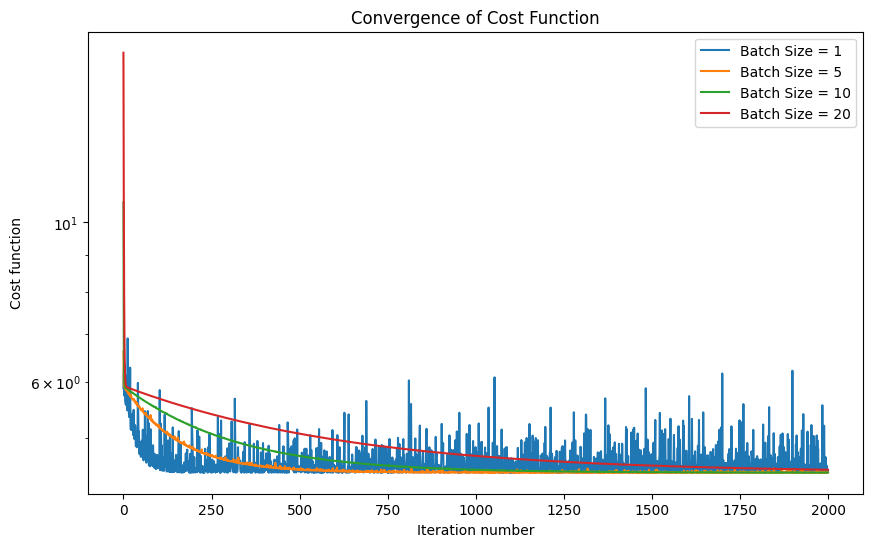

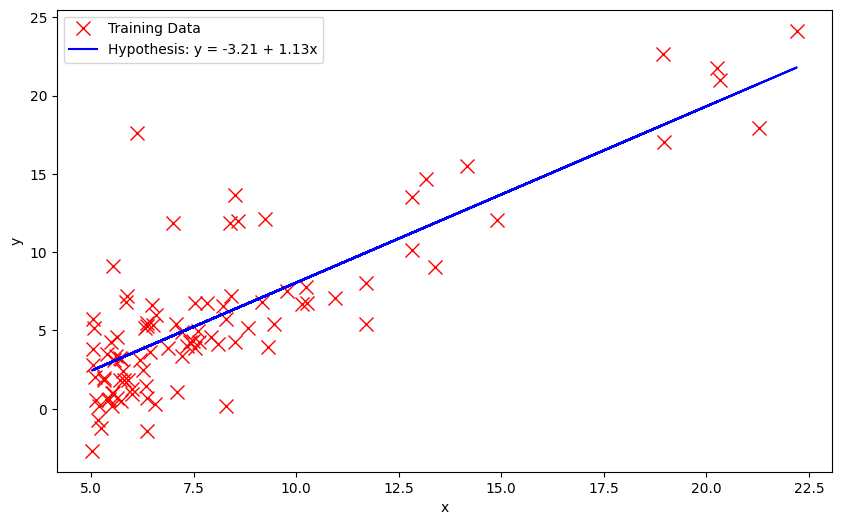

Predicted price for batch size 1: $156776.93
Predicted price for batch size 5: $153341.37
Predicted price for batch size 10: $150212.51
Predicted price for batch size 20: $148114.30


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hypothesis function
def h(w, X):
    return np.dot(X, w)

# Mean Squared Error function
def mse(w, X, y):
    return float((1. / (2 * len(y))) * np.dot((h(w, X) - y).T, (h(w, X) - y)))

# Mini-batch gradient descent
def mini_batch_gradient_descent(X, y, batch_size, w_start=None, iterations=2000, alpha=0.001):
    m, n = X.shape
    if w_start is None:
        w_start = np.zeros((n, 1))
    w = w_start
    J_values = []
    w_store = []

    for _ in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            gradient = (1 / batch_size) * np.dot(X_batch.T, (h(w, X_batch) - y_batch))
            w -= alpha * gradient

        J_values.append(mse(w, X, y))
        w_store.append(list(w[:, 0]))

    return w, w_store, J_values

# Prediction function
def predict(w, xval):
    return w[0] + w[1] * xval

# --- Main part of the code ---
batch_sizes = [1, 5, 10, 20]
plt.figure(figsize=(10, 6))

weights_per_batch = {}  # Store weights for each batch size

for batch_size in batch_sizes:
    w, w_store, J_values = mini_batch_gradient_descent(X, y, batch_size)
    weights_per_batch[batch_size] = w  # Store the weights
    plt.plot(range(len(J_values)), J_values, label=f'Batch Size = {batch_size}')

plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")
plt.yscale('log')
plt.legend()
plt.show()

# Plot final hypothesis function (using the last trained weights)
plt.figure(figsize=(10, 6))
plt.plot(X[:, 1], y, 'rx', markersize=10, label='Training Data')
plt.plot(X[:, 1], predict(w, X[:, 1]), 'b-', label=f'Hypothesis: y = {w[0][0]:.2f} + {w[1][0]:.2f}x')
# Using 'w' from the last iteration
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Predictions for each batch size:
population_160k = 16

for batch_size, weights in weights_per_batch.items():
    predicted_price = predict(weights, population_160k)
    print(f"Predicted price for batch size {batch_size}: ${predicted_price[0]*10000:.2f}")

As the batch size increases, the convergence of the cost function generally becomes smoother and more stable.
Smaller batch sizes (like 1) lead to more noise and oscillations in the cost function during training,
while larger batch sizes (like 20) result in a more gradual and consistent decrease in the cost function.
This is because smaller batches introduce more variability in the gradient updates as they are based on
a smaller subset of the data. Larger batches provide a better estimate of the true gradient, leading to
more stable updates and smoother convergence.

Problem 3: Use the Scikit-learn breast cancer Wisconsin dataset and a logistic regression
model to classify breast cancers. You must recursively eliminate features to find the best
two features to perform the classification. Evaluate the model using various classification
metrics and report your findings. Use a 70%-30% split

Selected Features: Index(['worst area', 'worst concave points'], dtype='object')
Accuracy: 0.9649122807017544
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1-score: 0.9722222222222222


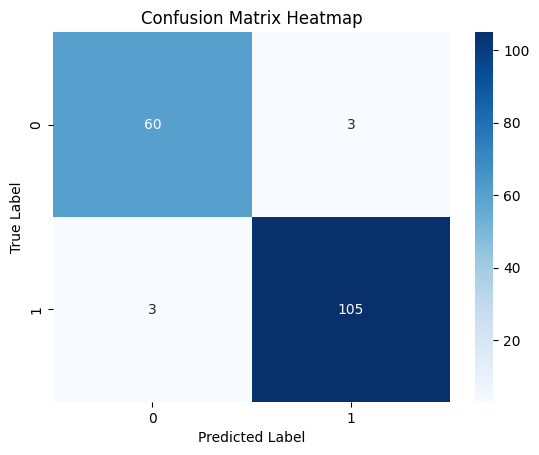


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load the breast cancer dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the data into training and testing sets (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Use RFE to select the best two features
rfe = RFE(estimator=model, n_features_to_select=2)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Train the model using the selected features
X_train_selected = X_train[:, rfe.support_]
X_test_selected = X_test[:, rfe.support_]
model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_selected)

# Evaluate the model using various classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


# Print the evaluation metrics and selected features
print("Selected Features:", selected_features)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()
print("\nClassification Report:\n", class_report)

 Problem 4: Construct a neural network with a single hidden layer containing two neurons
using Tensorflow. Use ReLU as activation function. Optimize the network with stochastic
gradient descent method. Choose mean squared error to calculate the loss. Fit the housing
prices dataset found on LMS using the network. Use the trained neural network model
to predict the price of a house in a city with population of 165, 000. Calculate a useful
regression metric. Plot the training and validation losses. Use a 70%-30% split for the
training and validation dataset. The architecture of the neural network and the optimizer are fixed for this problem. Therefore, you need to choose a suitable learning rate and number of epochs to minimize the loss. Explain the trends you found in the plots for training and validation losses

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


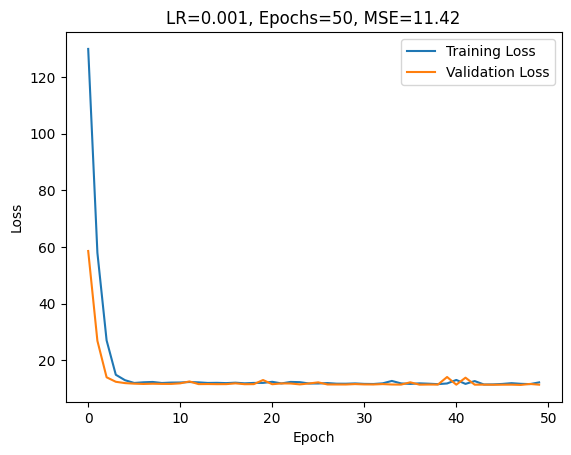

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
LR=0.001, Epochs=50, Predicted price for 165k: $124181.59, R-squared: 0.5849


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


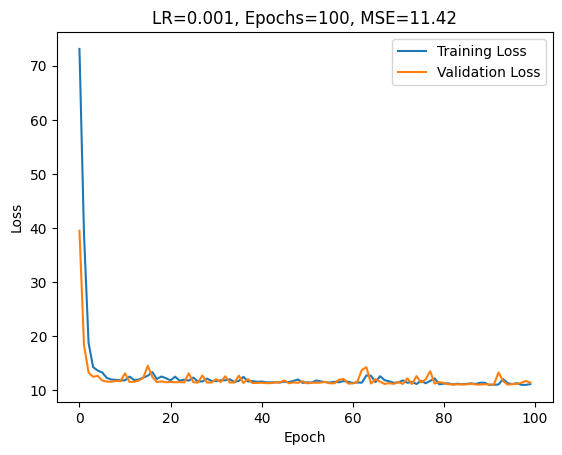

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
LR=0.001, Epochs=100, Predicted price for 165k: $144469.96, R-squared: 0.5850


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


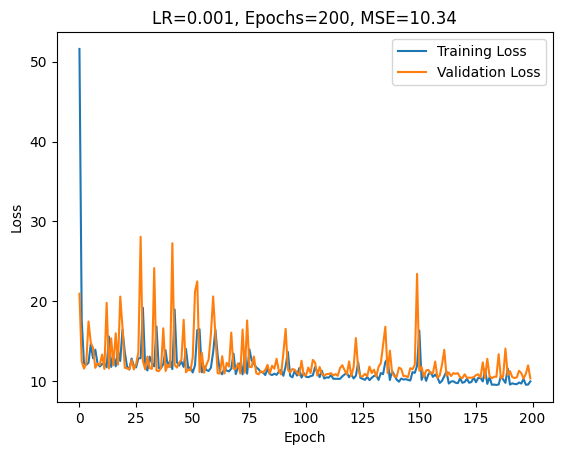

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
LR=0.001, Epochs=200, Predicted price for 165k: $138168.43, R-squared: 0.6241


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


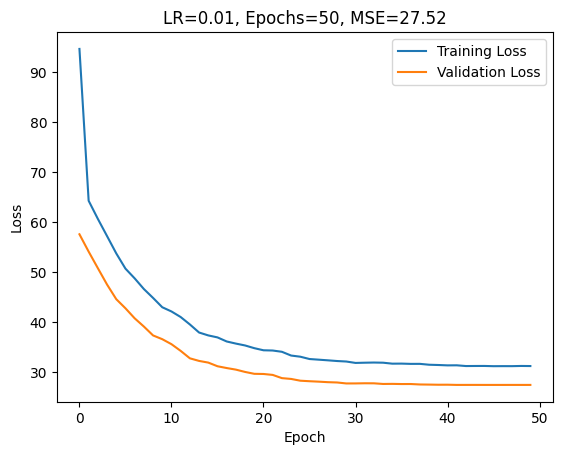

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
LR=0.01, Epochs=50, Predicted price for 165k: $55694.45, R-squared: -0.0000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


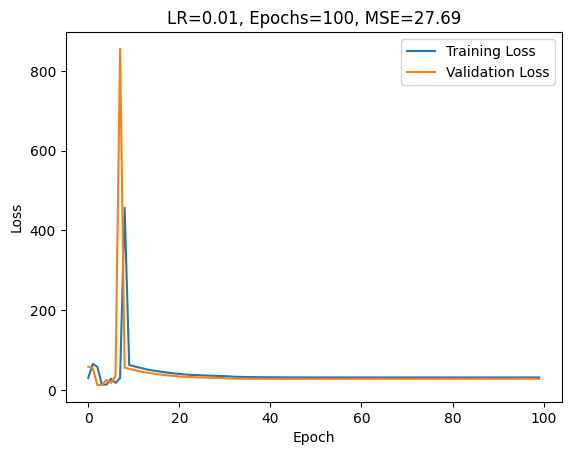

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step
LR=0.01, Epochs=100, Predicted price for 165k: $60223.03, R-squared: -0.0063


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


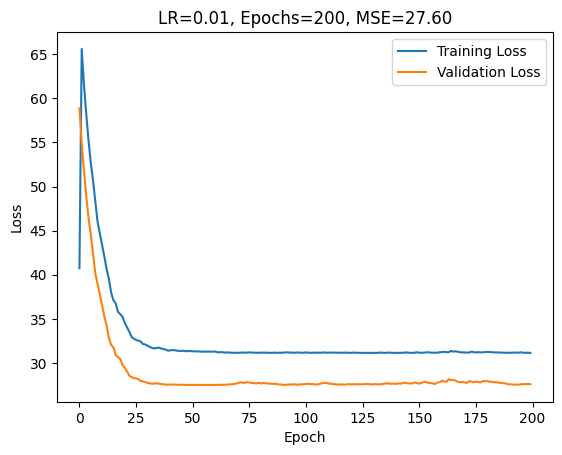

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
LR=0.01, Epochs=200, Predicted price for 165k: $58947.57, R-squared: -0.0030


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


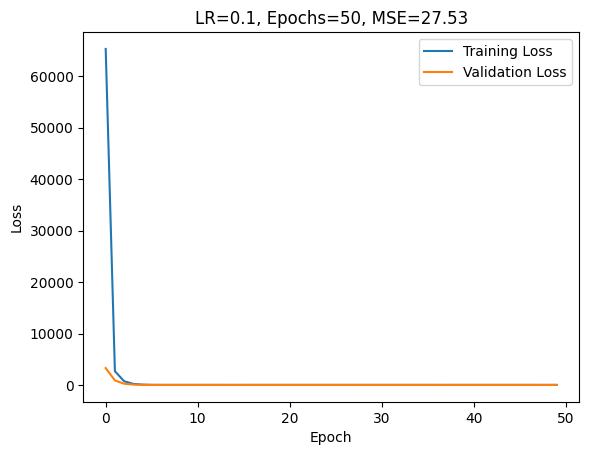

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
LR=0.1, Epochs=50, Predicted price for 165k: $55007.18, R-squared: -0.0004


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step


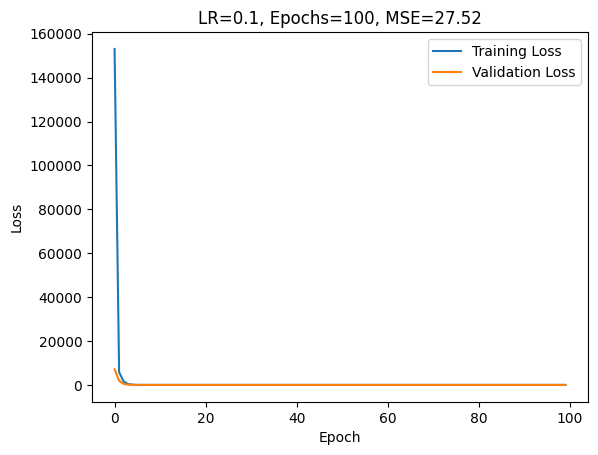

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
LR=0.1, Epochs=100, Predicted price for 165k: $56231.25, R-squared: -0.0000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


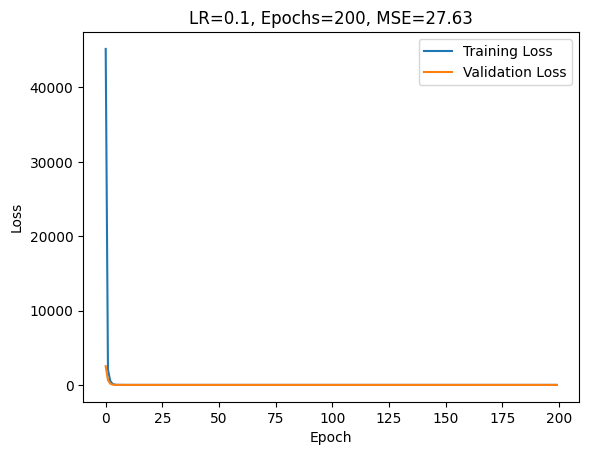

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
LR=0.1, Epochs=200, Predicted price for 165k: $52681.66, R-squared: -0.0042
Best Learning Rate: 0.001
Best Epochs: 200
Best MSE: 10.34
Best R-squared: 0.6241

Results for all combinations:
   learning_rate  epochs        mse        r2
0          0.001      50  11.422193  0.584918
1          0.001     100  11.420952  0.584963
2          0.001     200  10.343000  0.624136
3          0.010      50  27.519273 -0.000050
4          0.010     100  27.690916 -0.006287
5          0.010     200  27.601081 -0.003022
6          0.100      50  27.529071 -0.000406
7          0.100     100  27.518191 -0.000010
8          0.100     200  27.632288 -0.004156


In [45]:

#X=X[:,1]
#y=y[:,0]
X = X.reshape(-1, 1)

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Split the data into training and validation sets (70%-30%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a range of learning rates and epochs
learning_rates = [0.001, 0.01, 0.1]
epochs_list = [50, 100, 200]

best_mse = float('inf')
best_r2 = float('-inf')
best_learning_rate = None
best_epochs = None

results = []

# Iterate through different combinations
for learning_rate in learning_rates:
    for epochs in epochs_list:
        # Define the model
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),  # Adjust input shape
            tf.keras.layers.Dense(1)
        ])

        # Compile the model
        model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
                      loss='mean_squared_error')

        # Train the model
        history = model.fit(X_train, y_train, epochs=epochs,
                            validation_data=(X_val, y_val), verbose=0)

        # Evaluate on validation set
        y_pred = model.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)

        results.append({
            'learning_rate': learning_rate,
            'epochs': epochs,
            'mse': mse,
            'r2': r2
        })

        # Check if this combination is better
        if mse < best_mse:
            best_mse = mse
            best_r2 = r2
            best_learning_rate = learning_rate
            best_epochs = epochs

        # Plot training and validation losses
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'LR={learning_rate}, Epochs={epochs}, MSE={mse:.2f}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        # Predict for population of 165,000
        population_165k = np.array([[16.5]])  # Reshape to (1, 1)
        predicted_price = model.predict(population_165k)
        print(f"LR={learning_rate}, Epochs={epochs}, "
              f"Predicted price for 165k: ${predicted_price[0][0] * 10000:.2f}, "
              f"R-squared: {r2:.4f}")

# Print best hyperparameters and results
print(f"Best Learning Rate: {best_learning_rate}")
print(f"Best Epochs: {best_epochs}")
print(f"Best MSE: {best_mse:.2f}")
print(f"Best R-squared: {best_r2:.4f}")

# Display results table
print("\nResults for all combinations:")
df_results = pd.DataFrame(results)
print(df_results)

Best learning rate and epochs reported in the code output above.

I notice the following trends in the produced charts and the MSE caused by each variation in the learning rate and epochs.
Increase in epochs did not always reduce MSE.Leading the conclusion certain combinations of learning rate and epoc were leading to overfitting. The chart shows this as the validation loss starts to trend above the training loss after a certain point. However, that increase is much more signficant between 50 to 100 versus 100 to 200.
High learning rates result in a model that has increased loss in the training data compared to validation but generally a high MSE. The best model being a low learning rate but a low number of Epochs makes sense as this avoided overfitting the data but also had the loss be very close between validation and training.

